# Titanic in Python

## Loading dependencies & data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('Titanic-Dataset.csv')
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Pre-Processing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df = df.dropna()
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [34]:
def export_dataframe(df, filename='processed_titanic.csv', index=False):
    """
    Export DataFrame to CSV file
    
    Args:
        df: pandas DataFrame to export
        filename: output filename (default: 'processed_titanic.csv')
        index: whether to include index in CSV (default: False)
    """
    try:
        df.to_csv(filename, index=index)
        print(f"Successfully exported DataFrame to {filename}")
    except Exception as e:
        print(f"Error exporting DataFrame: {e}")

# Usage example:
export_dataframe(df)

Successfully exported DataFrame to processed_titanic.csv


In [35]:

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

In [37]:
df['Sex'].value_counts() 

Sex
0    453
1    259
Name: count, dtype: int64

## Train with Logistic Regression

In [38]:
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.80


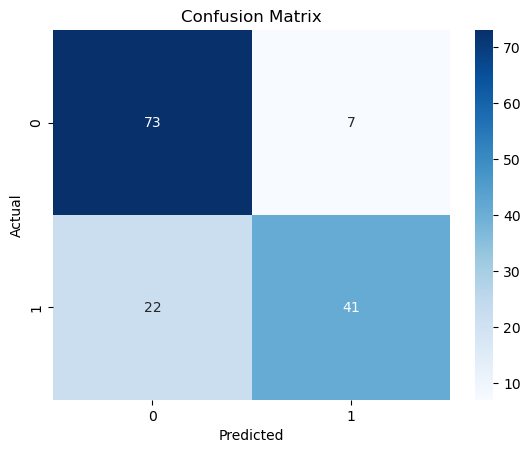

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))


## EDA

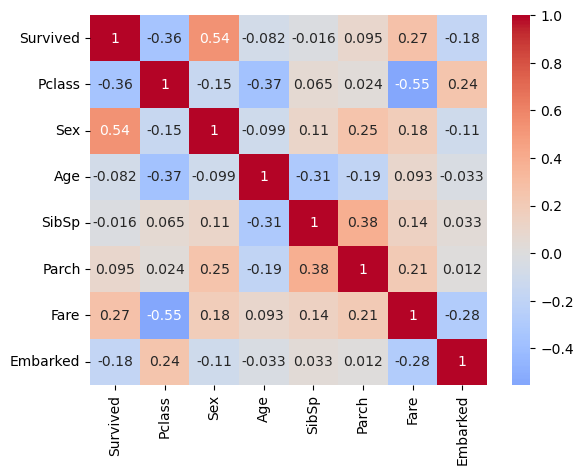

<Figure size 1000x800 with 0 Axes>

In [53]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.figure(figsize=(10, 8))
plt.show()